 # **1. Web Scraping**

In [1]:
#!pip install pandas requests

import pandas as pd
import requests
import numpy as np
import time

# To display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)  # so we can see all columns in a wide DataFrame

# Define the URL
test_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2023-24&SeasonType=Regular%20Season&StatCategory=AST'

# Send a GET request to the URL and get the response in JSON format
r = requests.get(test_url).json()

# Create a DataFrame from the JSON data
# You may need to access the correct portion of the JSON object
col_names = r['resultSet']['headers']
df = pd.DataFrame(r['resultSet']['rowSet'], columns= col_names)

# Display the DataFrame
print(df)


     PLAYER_ID  RANK              PLAYER     TEAM_ID TEAM  GP   MIN  FGM  \
0      1630169     1   Tyrese Haliburton  1610612754  IND  69  2224  500   
1       203999     2        Nikola Jokić  1610612743  DEN  79  2737  822   
2      1629029     3         Luka Dončić  1610612742  DAL  70  2624  804   
3      1627734     4    Domantas Sabonis  1610612758  SAC  82  2928  634   
4       201935     5        James Harden  1610612746  LAC  72  2470  352   
..         ...   ...                 ...         ...  ...  ..   ...  ...   
567    1629623   553   Lindell Wigginton  1610612749  MIL   3     8    2   
568    1630608   553     Malcolm Cazalon  1610612765  DET   1     3    0   
569    1631250   553          Pete Nance  1610612739  CLE   8    27    1   
570    1641754   553          Seth Lundy  1610612737  ATL   9    52    4   
571    1627885   553  Shaquille Harrison  1610612763  MEM   3     6    1   

      FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB   REB  \
0    1048

In [2]:
from IPython.display import display
display(df)

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1630169,1,Tyrese Haliburton,1610612754,IND,69,2224,500,1048,0.477,195,535,0.364,194,227,0.855,35,236,271,752,83,48,159,75,1389,1803,4.73,0.52
1,203999,2,Nikola Jokić,1610612743,DEN,79,2737,822,1411,0.583,83,231,0.359,358,438,0.817,223,753,976,708,108,68,237,194,2085,3039,2.99,0.46
2,1629029,3,Luka Dončić,1610612742,DAL,70,2624,804,1652,0.487,284,744,0.382,478,608,0.786,59,588,647,686,99,38,282,149,2370,2580,2.43,0.35
3,1627734,4,Domantas Sabonis,1610612758,SAC,82,2928,634,1068,0.594,33,87,0.379,292,415,0.704,294,826,1120,673,74,48,272,250,1593,2679,2.47,0.27
4,201935,5,James Harden,1610612746,LAC,72,2470,352,822,0.428,186,488,0.381,302,344,0.878,34,335,369,614,77,57,185,127,1192,1612,3.32,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,1629623,553,Lindell Wigginton,1610612749,MIL,3,8,2,5,0.400,0,2,0.000,2,2,1.000,0,0,0,0,0,0,1,1,6,2,0.00,0.00
568,1630608,553,Malcolm Cazalon,1610612765,DET,1,3,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
569,1631250,553,Pete Nance,1610612739,CLE,8,27,1,6,0.167,1,1,1.000,0,2,0.000,0,3,3,0,1,0,1,2,3,-1,0.00,1.00
570,1641754,553,Seth Lundy,1610612737,ATL,9,52,4,17,0.235,3,13,0.231,3,4,0.750,1,6,7,0,0,0,1,6,14,6,0.00,0.00


In [3]:
import pandas as pd


# Extracting the data into a DataFrame from the 'rowSet' part of the response
temp_df1 = pd.DataFrame(r['resultSet']['rowSet'], columns=col_names)

# Creating additional columns: 'Year' and 'Season_type' for the DataFrame
# The 'Year' will be '2023-24' and 'Regular%20Season' will be 'Regular Season' for all rows
temp_df2 = pd.DataFrame({
    'Year': ['2023-24' for i in range(len(temp_df1))],
    'Season_type': ['Regular_Season' for i in range(len(temp_df1))]
})

# Concatenating the two DataFrames horizontally (axis=1) to combine the new columns
temp_df3 = pd.concat([temp_df2, temp_df1], axis=1)

# Display the combined DataFrame
print(temp_df3.head())  # Displaying the first few rows of the resulting DataFrame


      Year     Season_type  PLAYER_ID  RANK             PLAYER     TEAM_ID  \
0  2023-24  Regular_Season    1630169     1  Tyrese Haliburton  1610612754   
1  2023-24  Regular_Season     203999     2       Nikola Jokić  1610612743   
2  2023-24  Regular_Season    1629029     3        Luka Dončić  1610612742   
3  2023-24  Regular_Season    1627734     4   Domantas Sabonis  1610612758   
4  2023-24  Regular_Season     201935     5       James Harden  1610612746   

  TEAM  GP   MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
0  IND  69  2224  500  1048   0.477   195   535    0.364  194  227   0.855   
1  DEN  79  2737  822  1411   0.583    83   231    0.359  358  438   0.817   
2  DAL  70  2624  804  1652   0.487   284   744    0.382  478  608   0.786   
3  SAC  82  2928  634  1068   0.594    33    87    0.379  292  415   0.704   
4  LAC  72  2470  352   822   0.428   186   488    0.381  302  344   0.878   

   OREB  DREB   REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_

In [4]:
# Deleting previous temporary DataFrames if they exist
del temp_df1, temp_df2, temp_df3

# Define df_cols to include 'Year', 'Season_type', and the existing table headers
df_cols = ['Year', 'Season_type'] + col_names

# Create an empty DataFrame with columns as df_cols
df = pd.DataFrame(columns=df_cols)



In [5]:
df

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV


In [6]:
headers={
  'accept': '*/*',
  'accept-encoding': 'gzip, deflate, br, zstd',
  'accept-language': 'en-US,en;q=0.9',
  'connection': 'keep-alive',
  'host':'stats.nba.com',
  'origin': 'https://www.nba.com',
  'referer':'https://www.nba.com/',
  'sec-ch-ua': '"Chromium";v="128", "Not;A=Brand";v="24", "Google Chrome";v="128"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': "Windows",
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site':'same-site',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36'
}

In [7]:
!pip install openpyxl


In [8]:
# Define the season types and years
season_types = ['Regular%20Season', 'Playoffs']
years = ['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', 
         '2017-18', '2018-19', '2019-20', '2020-21', '2021-22','2022-23','2023-24']

begin_loop=time.time()

# Loop through each year and season type
for y in years:
    for s in season_types:
        api_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season='+y+'&SeasonType='+s+'&StatCategory=AST'
        r = requests.get(url = api_url, headers= headers).json()
        # Extract data from the response
        temp_df1 = pd.DataFrame(r['resultSet']['rowSet'], columns=col_names)
        
        # Create DataFrame for Year and Season_type
        temp_df2 = pd.DataFrame({
            'Year': [y for i in range(len(temp_df1))],
            'Season_type': [s for i in range(len(temp_df1))]
        })
        
        # Concatenate both DataFrames horizontally
        temp_df3 = pd.concat([temp_df2, temp_df1], axis=1)
        
        # Append the concatenated DataFrame to the main df DataFrame
        df = pd.concat([df, temp_df3], axis=0)
        print(f'Finished Scraping data for the {y} {s}.')
        lag = np.random.uniform(low =5,high =40)
        print(f'waiting{round(lag,1)} seconds')
time.sleep(lag)

print(f'process completed..total run time: {round(time.time()-begin_loop)/60,2}')
#df.to_excel('NBA_data.xlsx',index=False)

/tmp/ipykernel_4927/2167159817.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df3], axis=0)


Finished Scraping data for the 2012-13 Regular%20Season.
waiting33.4 seconds
Finished Scraping data for the 2012-13 Playoffs.
waiting33.4 seconds
Finished Scraping data for the 2013-14 Regular%20Season.
waiting11.9 seconds
Finished Scraping data for the 2013-14 Playoffs.
waiting15.0 seconds
Finished Scraping data for the 2014-15 Regular%20Season.
waiting9.9 seconds
Finished Scraping data for the 2014-15 Playoffs.
waiting31.6 seconds
Finished Scraping data for the 2015-16 Regular%20Season.
waiting16.9 seconds
Finished Scraping data for the 2015-16 Playoffs.
waiting18.2 seconds
Finished Scraping data for the 2016-17 Regular%20Season.
waiting36.5 seconds
Finished Scraping data for the 2016-17 Playoffs.
waiting17.0 seconds
Finished Scraping data for the 2017-18 Regular%20Season.
waiting8.3 seconds
Finished Scraping data for the 2017-18 Playoffs.
waiting7.2 seconds
Finished Scraping data for the 2018-19 Regular%20Season.
waiting11.9 seconds
Finished Scraping data for the 2018-19 Playoffs.
w

In [9]:
#Display the DataFrame
display(df)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,202349,1,Greivis Vasquez,1610612740,NOH,78,2685,438,1012,0.433,83,243,0.342,124,154,0.805,43,294,337,704,66,6,247,190,1083,1345,2.85,0.27
1,2012-13,Regular%20Season,101108,2,Chris Paul,1610612746,LAC,70,2335,412,856,0.481,76,232,0.328,286,323,0.885,53,209,262,678,169,10,159,143,1186,1665,4.26,1.06
2,2012-13,Regular%20Season,201950,3,Jrue Holiday,1610612755,PHI,78,2926,555,1288,0.431,91,247,0.368,182,242,0.752,89,240,329,625,123,32,292,170,1383,1407,2.14,0.42
3,2012-13,Regular%20Season,201566,4,Russell Westbrook,1610612760,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,111,317,428,607,145,24,273,189,1903,1857,2.22,0.53
4,2012-13,Regular%20Season,101114,5,Deron Williams,1610612751,BKN,78,2842,495,1124,0.440,169,447,0.378,317,369,0.859,29,203,232,604,75,30,218,194,1476,1518,2.77,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023-24,Playoffs,1631172,186,Ousmane Dieng,1610612760,OKC,4,7,1,2,0.500,0,1,0.000,0,0,0.000,0,0,0,0,0,0,0,0,2,1,0.00,0.00
210,2023-24,Playoffs,200782,186,P.J. Tucker,1610612746,LAC,2,31,4,6,0.667,3,4,0.750,0,0,0.000,3,0,3,0,0,0,3,6,11,9,0.00,0.00
211,2023-24,Playoffs,201152,186,Thaddeus Young,1610612756,PHX,1,4,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
212,2023-24,Playoffs,203648,186,Thanasis Antetokounmpo,1610612749,MIL,2,5,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,1,1,0,1,0,2,0.00,0.00


## ** 2. Exploratory Data Analysis**

In [10]:
df.describe()

,FG_PCT,FG3_PCT,FT_PCT,AST_TOV,STL_TOV
count,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000
mean,0.433898,0.272109,0.673971,1.582568,0.628661
std,0.135812,0.175926,0.263281,1.156207,0.556496
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.392000,0.167000,0.621000,0.900000,0.330000
50%,0.439000,0.324000,0.750000,1.460000,0.530000
75%,0.494000,0.375000,0.833000,2.110000,0.810000
max,1.000000,1.000000,1.000000,17.000000,8.000000


In [11]:
# Convert season_type from URL-encoded format to regular string
df['Season_type'] = df['Season_type'].replace('%20', ' ', regex=True)

In [12]:
display(df)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular Season,202349,1,Greivis Vasquez,1610612740,NOH,78,2685,438,1012,0.433,83,243,0.342,124,154,0.805,43,294,337,704,66,6,247,190,1083,1345,2.85,0.27
1,2012-13,Regular Season,101108,2,Chris Paul,1610612746,LAC,70,2335,412,856,0.481,76,232,0.328,286,323,0.885,53,209,262,678,169,10,159,143,1186,1665,4.26,1.06
2,2012-13,Regular Season,201950,3,Jrue Holiday,1610612755,PHI,78,2926,555,1288,0.431,91,247,0.368,182,242,0.752,89,240,329,625,123,32,292,170,1383,1407,2.14,0.42
3,2012-13,Regular Season,201566,4,Russell Westbrook,1610612760,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,111,317,428,607,145,24,273,189,1903,1857,2.22,0.53
4,2012-13,Regular Season,101114,5,Deron Williams,1610612751,BKN,78,2842,495,1124,0.440,169,447,0.378,317,369,0.859,29,203,232,604,75,30,218,194,1476,1518,2.77,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023-24,Playoffs,1631172,186,Ousmane Dieng,1610612760,OKC,4,7,1,2,0.500,0,1,0.000,0,0,0.000,0,0,0,0,0,0,0,0,2,1,0.00,0.00
210,2023-24,Playoffs,200782,186,P.J. Tucker,1610612746,LAC,2,31,4,6,0.667,3,4,0.750,0,0,0.000,3,0,3,0,0,0,3,6,11,9,0.00,0.00
211,2023-24,Playoffs,201152,186,Thaddeus Young,1610612756,PHX,1,4,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
212,2023-24,Playoffs,203648,186,Thanasis Antetokounmpo,1610612749,MIL,2,5,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,1,1,0,1,0,2,0.00,0.00


In [13]:
# Check for NA (missing) values in each column
missing_values = df.isna().sum()

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64


In [14]:
df = df.drop(columns=['TEAM_ID', 'PLAYER_ID'])

print(df.head())

      Year     Season_type RANK             PLAYER TEAM  GP   MIN  FGM   FGA  \
0  2012-13  Regular Season    1    Greivis Vasquez  NOH  78  2685  438  1012   
1  2012-13  Regular Season    2         Chris Paul  LAC  70  2335  412   856   
2  2012-13  Regular Season    3       Jrue Holiday  PHI  78  2926  555  1288   
3  2012-13  Regular Season    4  Russell Westbrook  OKC  82  2861  673  1535   
4  2012-13  Regular Season    5     Deron Williams  BKN  78  2842  495  1124   

   FG_PCT FG3M FG3A  FG3_PCT  FTM  FTA  FT_PCT OREB DREB  REB  AST  STL BLK  \
0   0.433   83  243    0.342  124  154   0.805   43  294  337  704   66   6   
1   0.481   76  232    0.328  286  323   0.885   53  209  262  678  169  10   
2   0.431   91  247    0.368  182  242   0.752   89  240  329  625  123  32   
3   0.438   97  300    0.323  460  575   0.800  111  317  428  607  145  24   
4   0.440  169  447    0.378  317  369   0.859   29  203  232  604   75  30   

   TOV   PF   PTS   EFF  AST_TOV  STL_TOV  


In [15]:
display(df)

,Year,Season_type,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular Season,1,Greivis Vasquez,NOH,78,2685,438,1012,0.433,83,243,0.342,124,154,0.805,43,294,337,704,66,6,247,190,1083,1345,2.85,0.27
1,2012-13,Regular Season,2,Chris Paul,LAC,70,2335,412,856,0.481,76,232,0.328,286,323,0.885,53,209,262,678,169,10,159,143,1186,1665,4.26,1.06
2,2012-13,Regular Season,3,Jrue Holiday,PHI,78,2926,555,1288,0.431,91,247,0.368,182,242,0.752,89,240,329,625,123,32,292,170,1383,1407,2.14,0.42
3,2012-13,Regular Season,4,Russell Westbrook,OKC,82,2861,673,1535,0.438,97,300,0.323,460,575,0.800,111,317,428,607,145,24,273,189,1903,1857,2.22,0.53
4,2012-13,Regular Season,5,Deron Williams,BKN,78,2842,495,1124,0.440,169,447,0.378,317,369,0.859,29,203,232,604,75,30,218,194,1476,1518,2.77,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2023-24,Playoffs,186,Ousmane Dieng,OKC,4,7,1,2,0.500,0,1,0.000,0,0,0.000,0,0,0,0,0,0,0,0,2,1,0.00,0.00
210,2023-24,Playoffs,186,P.J. Tucker,LAC,2,31,4,6,0.667,3,4,0.750,0,0,0.000,3,0,3,0,0,0,3,6,11,9,0.00,0.00
211,2023-24,Playoffs,186,Thaddeus Young,PHX,1,4,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
212,2023-24,Playoffs,186,Thanasis Antetokounmpo,MIL,2,5,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,1,1,0,1,0,2,0.00,0.00


Storing the database in azure storage

In [16]:
# Save the DataFrame to a CSV file in the local Azure ML environment
df.to_csv('player_stat.csv', index=False)

In [17]:
!pip install azure-storage-blob


In [18]:
from azureml.core import Workspace, Datastore

# Connect to your workspace
ws = Workspace.from_config()

# Get the default datastore (or specify a named one)
datastore = Datastore.get(ws, datastore_name="workspaceblobstore")

# Upload the CSV file to the datastore
datastore.upload_files(files=['player_stat.csv'], target_path='data/', overwrite=True)

print("File uploaded to datastore successfully.")


"datastore.upload_files" is deprecated after version 1.0.69. Please use "FileDatasetFactory.upload_directory" instead. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 1 files
Uploading player_stat.csv
Uploaded player_stat.csv, 1 files out of an estimated total of 1
Uploaded 1 files
File uploaded to datastore successfully.


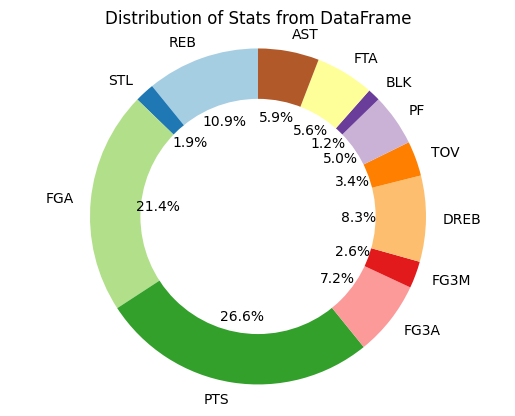

In [19]:
import matplotlib.pyplot as plt

columns = ['REB', 'STL', 'FGA', 'PTS', 'FG3A', 'FG3M', 'DREB', 'TOV', 'PF', 'BLK', 'FTA', 'AST']

column_sums = df[columns].sum()

labels = columns
sizes = column_sums.values  # Values from the DataFrame columns
colors = plt.cm.Paired.colors[:len(labels)]  # Generate colors for the chart

# Create the donut chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Distribution of Stats from DataFrame')

# Show the donut chart
plt.show()


In [20]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


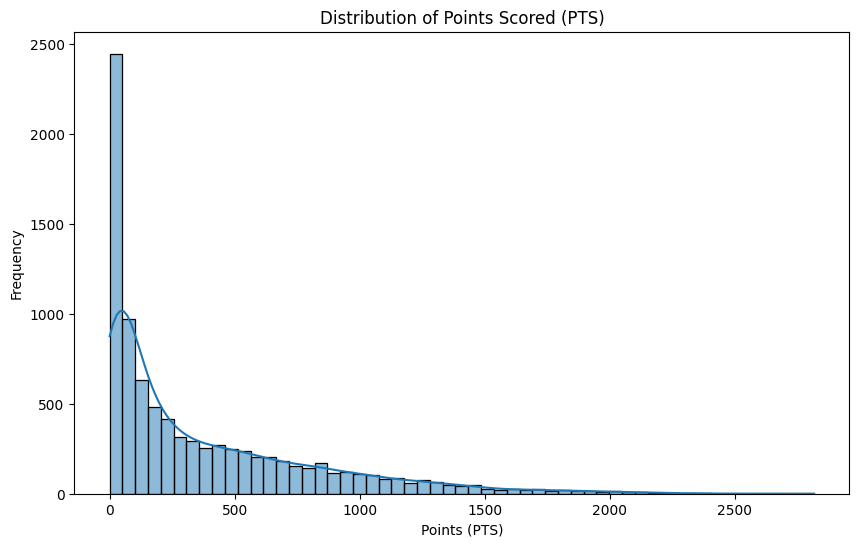

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Points (PTS)
plt.figure(figsize=(10, 6))
sns.histplot(df['PTS'], kde=True)
plt.title('Distribution of Points Scored (PTS)')
plt.xlabel('Points (PTS)')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Filter for ph Suns data
ph_df = df[df['TEAM'] == 'PHX']

# Display the filtered data
print(ph_df.head())


        Year     Season_type RANK            PLAYER TEAM  GP   MIN  FGM  FGA  \
6    2012-13  Regular Season    7      Goran Dragic  PHX  77  2581  401  906   
83   2012-13  Regular Season   84      Jared Dudley  PHX  79  2170  313  669   
100  2012-13  Regular Season  100        Luis Scola  PHX  82  2184  432  915   
126  2012-13  Regular Season  126  Kendall Marshall  PHX  48   702   56  151   
167  2012-13  Regular Season  167   Michael Beasley  PHX  75  1554  310  766   

     FG_PCT FG3M FG3A  FG3_PCT  FTM  FTA  FT_PCT OREB DREB  REB  AST  STL BLK  \
6     0.443   88  276    0.319  244  326   0.748   60  178  238  569  124  26   
83    0.468  106  271    0.391  129  162   0.796   79  166  245  203   75   8   
100   0.472    3   16    0.188  181  230   0.787  158  383  541  182   67  35   
126   0.371   23   73    0.315    8   14   0.571    4   38   42  143   22   4   
167   0.405   45  144    0.313   94  126   0.746   52  230  282  111   31  34   

     TOV   PF   PTS   EFF  AST_T

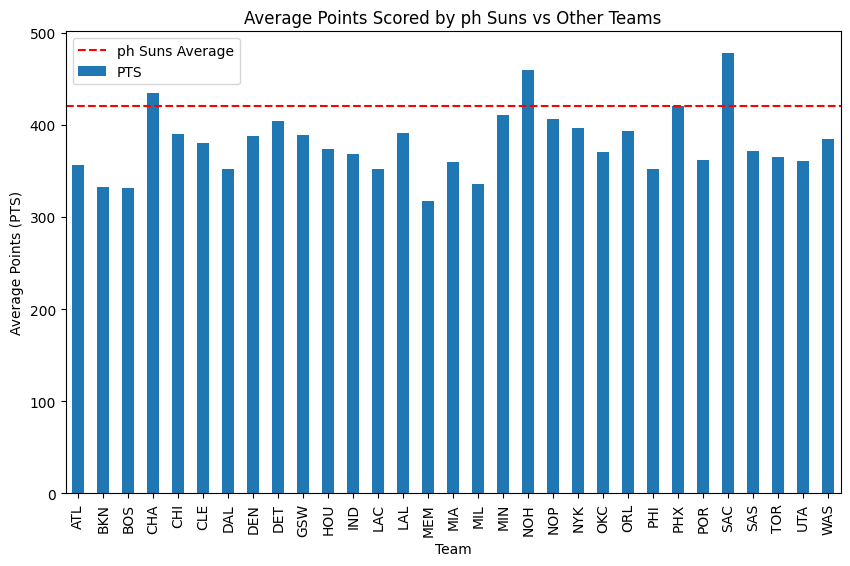

In [23]:
# Group by team and calculate the average points for each team
avg_points_per_team = df.groupby('TEAM')['PTS'].mean()

# Plot the average points comparison
plt.figure(figsize=(10, 6))
avg_points_per_team.plot(kind='bar')
plt.title('Average Points Scored by ph Suns vs Other Teams')
plt.xlabel('Team')
plt.ylabel('Average Points (PTS)')
plt.axhline(y=ph_df['PTS'].mean(), color='r', linestyle='--', label='ph Suns Average')
plt.legend()
plt.xticks(rotation=90)
plt.show()


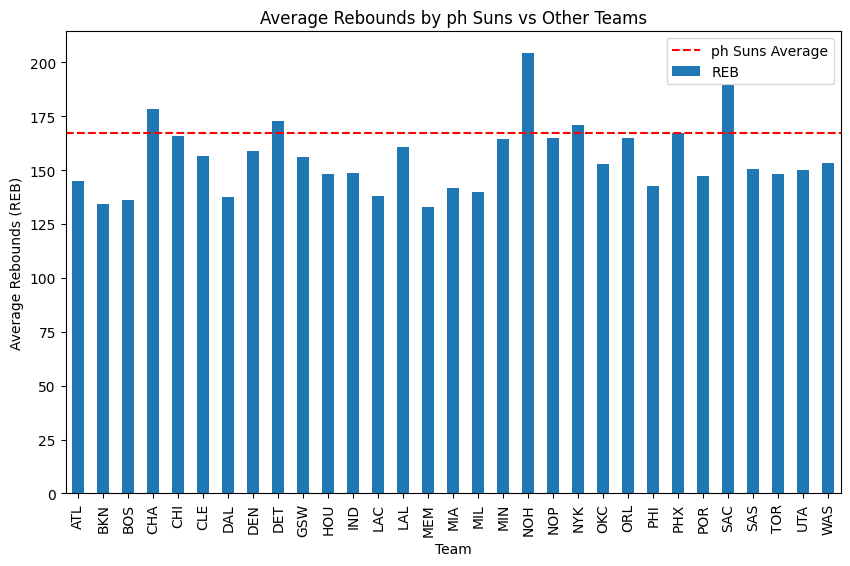

In [24]:
# Group by team and calculate the average rebounds for each team
avg_rebounds_per_team = df.groupby('TEAM')['REB'].mean()

# Plot the average rebounds comparison
plt.figure(figsize=(10, 6))
avg_rebounds_per_team.plot(kind='bar')
plt.title('Average Rebounds by ph Suns vs Other Teams')
plt.xlabel('Team')
plt.ylabel('Average Rebounds (REB)')
plt.axhline(y=ph_df['REB'].mean(), color='r', linestyle='--', label='ph Suns Average')
plt.legend()
plt.xticks(rotation=90)
plt.show()


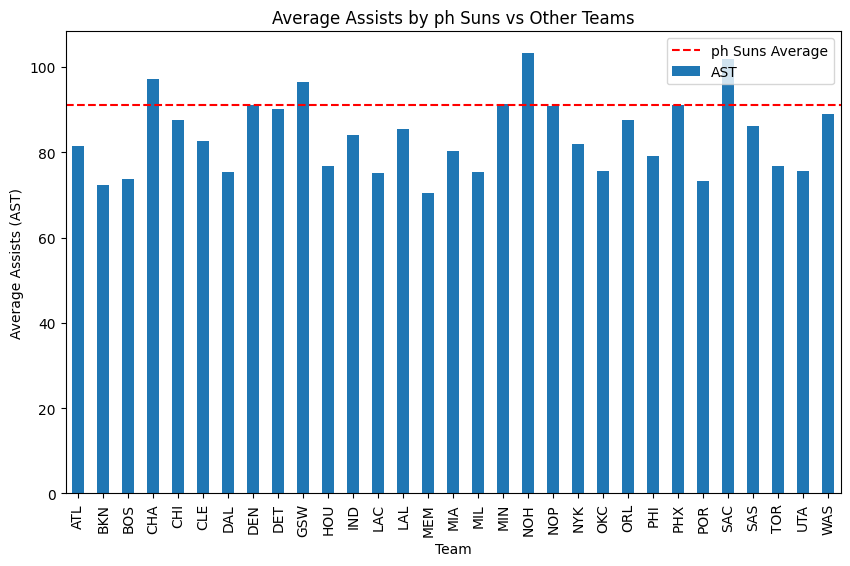

In [25]:
# Group by team and calculate the average assists for each team
avg_assists_per_team = df.groupby('TEAM')['AST'].mean()

# Plot the average assists comparison
plt.figure(figsize=(10, 6))
avg_assists_per_team.plot(kind='bar')
plt.title('Average Assists by ph Suns vs Other Teams')
plt.xlabel('Team')
plt.ylabel('Average Assists (AST)')
plt.axhline(y=ph_df['AST'].mean(), color='r', linestyle='--', label='ph Suns Average')
plt.legend()
plt.xticks(rotation=90)
plt.show()


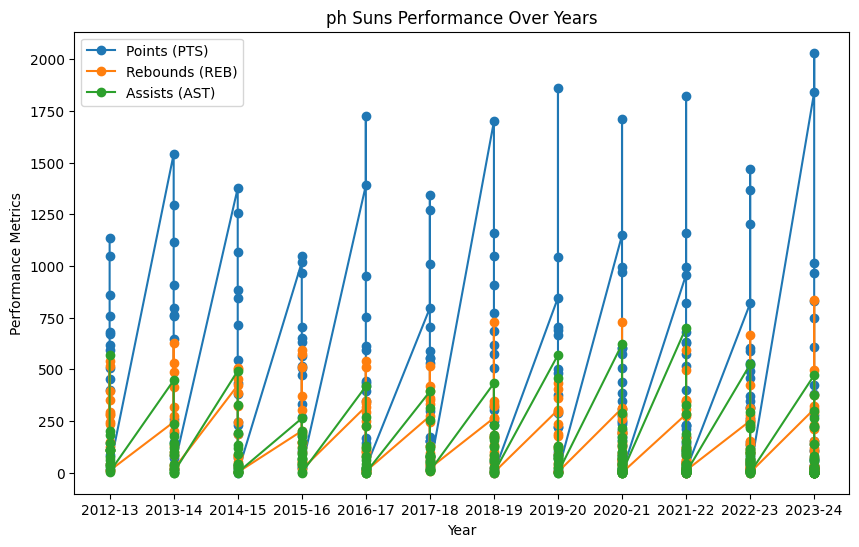

In [26]:
# Line plot for ph Suns performance over time (by year)
plt.figure(figsize=(10, 6))
plt.plot(ph_df['Year'], ph_df['PTS'], label='Points (PTS)', marker='o')
plt.plot(ph_df['Year'], ph_df['REB'], label='Rebounds (REB)', marker='o')
plt.plot(ph_df['Year'], ph_df['AST'], label='Assists (AST)', marker='o')
plt.title('ph Suns Performance Over Years')
plt.xlabel('Year')
plt.ylabel('Performance Metrics')
plt.legend()
plt.show()


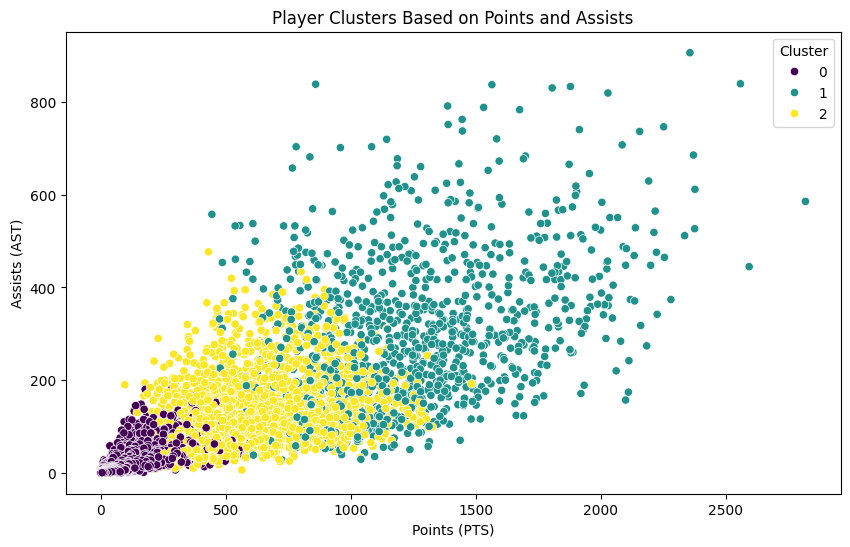

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant player performance metrics
X = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'EFF']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PTS'], y=df['AST'], hue=df['Cluster'], palette='viridis')
plt.title('Player Clusters Based on Points and Assists')
plt.xlabel('Points (PTS)')
plt.ylabel('Assists (AST)')
plt.show()

# Explanation:
# This clustering groups players into 3 clusters based on their Points, Assists, Rebounds, and other metrics.
# You can analyze the different clusters to identify player profiles like scorers, playmakers, and defenders.


In [28]:
# Summary statistics for ph Suns player metrics
ph_player_metrics = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'EFF', 'AST_TOV', 'STL_TOV']
ph_player_stats_summary = ph_df[ph_player_metrics].describe()

# Display summary statistics
print(ph_player_stats_summary)


          AST_TOV     STL_TOV
count  262.000000  262.000000
mean     1.547405    0.624122
std      1.100912    0.478934
min      0.000000    0.000000
25%      0.865000    0.330000
50%      1.370000    0.530000
75%      2.117500    0.827500
max      7.430000    3.670000


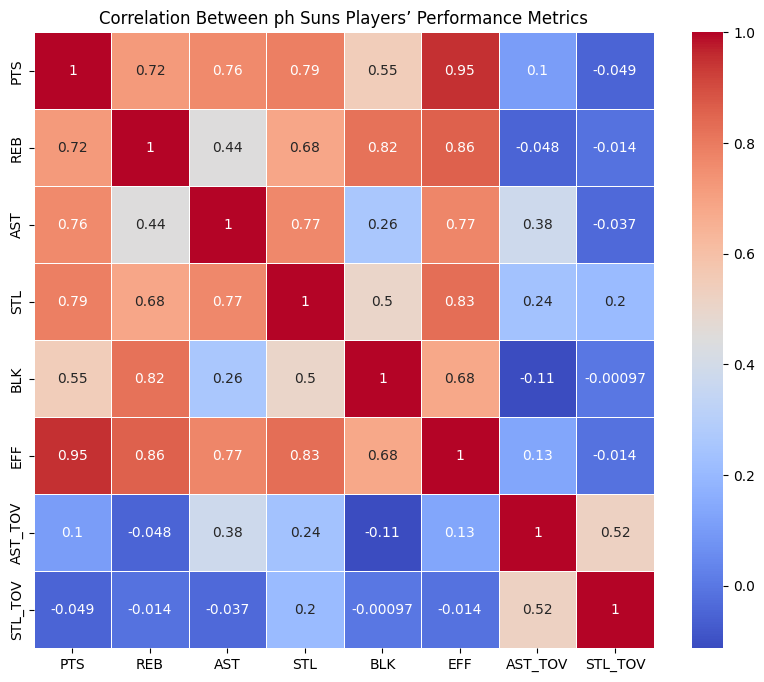

In [29]:
# Correlation matrix for ph Suns players' performance metrics
correlation_matrix_ph = ph_df[ph_player_metrics].corr()

# Visualize the correlation matrix for ph Suns players
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ph, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between ph Suns Players’ Performance Metrics')
plt.show()


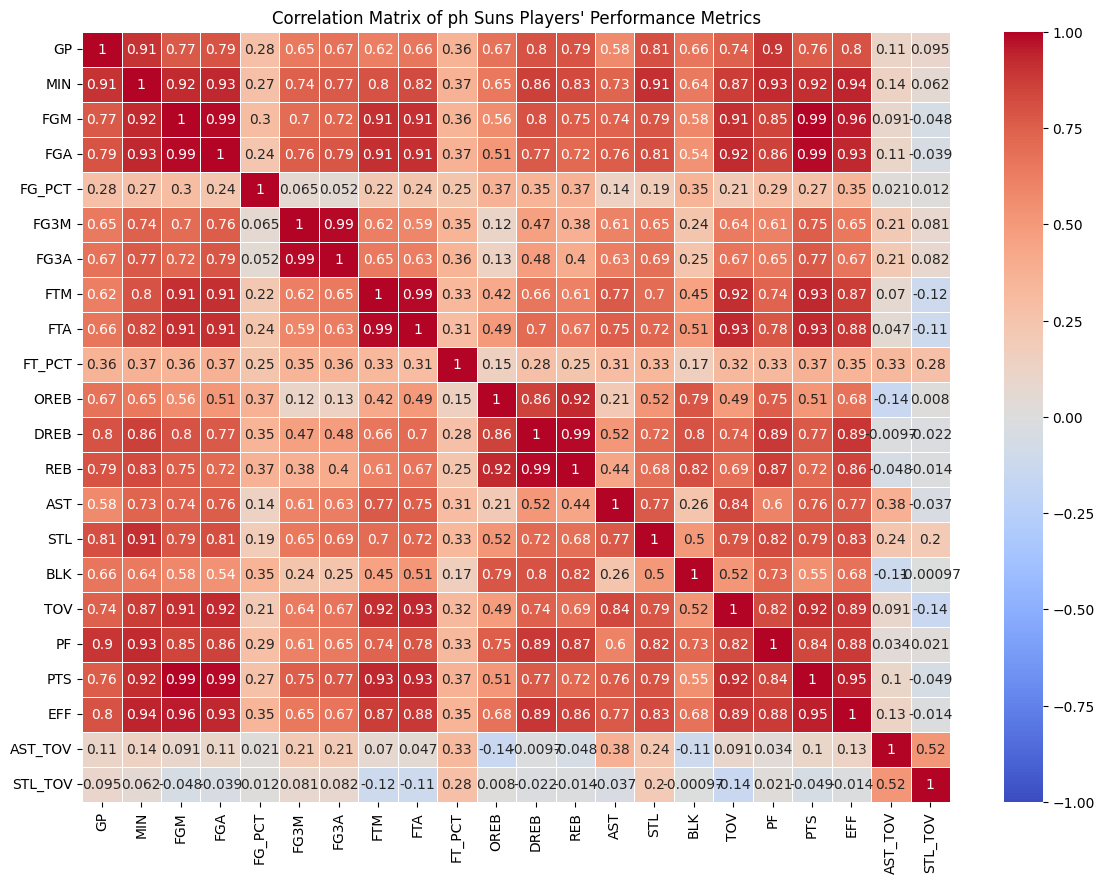

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant features for correlation analysis
relevant_features = ['GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FTM', 'FTA', 'FT_PCT', 
                     'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF', 
                     'AST_TOV', 'STL_TOV']

# Filter the data to include only these features
df_filtered = ph_df[relevant_features]

# Generate the correlation matrix
corr_matrix = df_filtered.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of ph Suns Players\' Performance Metrics')
plt.show()


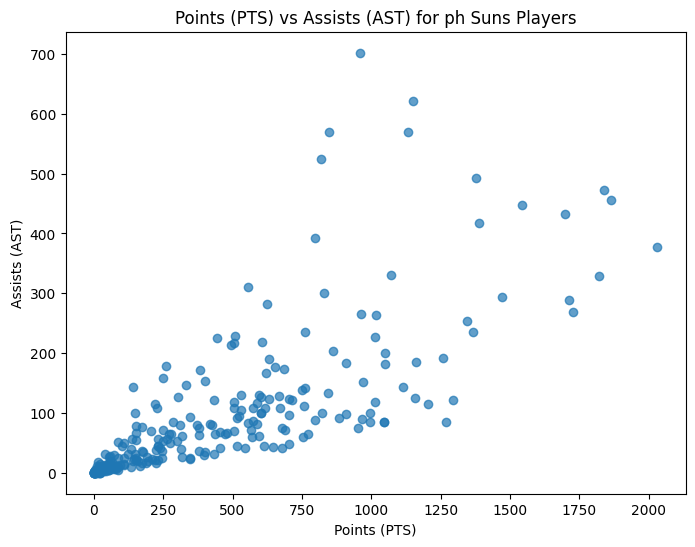

In [31]:
# Scatter plot for Points (PTS) vs Assists (AST) of ph Suns players
plt.figure(figsize=(8, 6))
plt.scatter(ph_df['PTS'], ph_df['AST'], alpha=0.7)
plt.title('Points (PTS) vs Assists (AST) for ph Suns Players')
plt.xlabel('Points (PTS)')
plt.ylabel('Assists (AST)')
plt.show()


In [32]:
!pip install ipywidgets


In [33]:
pip install pandas statsmodels scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Copy of original filtered dataframe
df_filtered_dropped = df_filtered.copy()

# Ensure all columns are numeric and drop non-numeric columns
df_filtered_dropped = df_filtered_dropped.select_dtypes(include=[np.number])

# Replace inf values with NaN and drop them
df_filtered_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_filtered_dropped.dropna(inplace=True)

# Set a VIF threshold
vif_threshold = 10

# Loop to drop features with VIF > threshold
while True:
    # Standardize the data again
    scaled_data = scaler.fit_transform(df_filtered_dropped)

    # Calculate VIF for the remaining features
    vif_data = calculate_vif(df_filtered_dropped)

    # Check for any inf or NaN values in VIF and handle them
    if np.isinf(vif_data['VIF']).any() or np.isnan(vif_data['VIF']).any():
        # Get the features with inf or NaN values in VIF
        problematic_features = vif_data[vif_data['VIF'].isin([np.inf, np.nan])]
        # Drop the first problematic feature
        feature_to_drop = problematic_features.iloc[0]['Feature']
        print(f"Dropping feature with infinite/NaN VIF: {feature_to_drop}")
        df_filtered_dropped = df_filtered_dropped.drop(columns=[feature_to_drop])
        continue

    # Check if any VIF is greater than the threshold
    high_vif = vif_data[vif_data['VIF'] > vif_threshold]
    
    # If no VIF values are greater than the threshold, break the loop
    if high_vif.empty:
        break

    # Drop the feature with the highest VIF
    feature_to_drop = high_vif.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping feature: {feature_to_drop} with VIF: {high_vif.sort_values('VIF', ascending=False).iloc[0]['VIF']}")
    df_filtered_dropped = df_filtered_dropped.drop(columns=[feature_to_drop])

# Display final VIF results
final_vif = calculate_vif(df_filtered_dropped)
print(final_vif)


   Feature       VIF
0   FG_PCT  6.876993
1   FT_PCT  8.623951
2  AST_TOV  4.266964
3  STL_TOV  3.737284


In [35]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have your data filtered for ph players (df_ph)
df_ph_filtered = ph_df[['FG_PCT', 'FT_PCT', 'AST_TOV', 'STL_TOV']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ph_filtered)


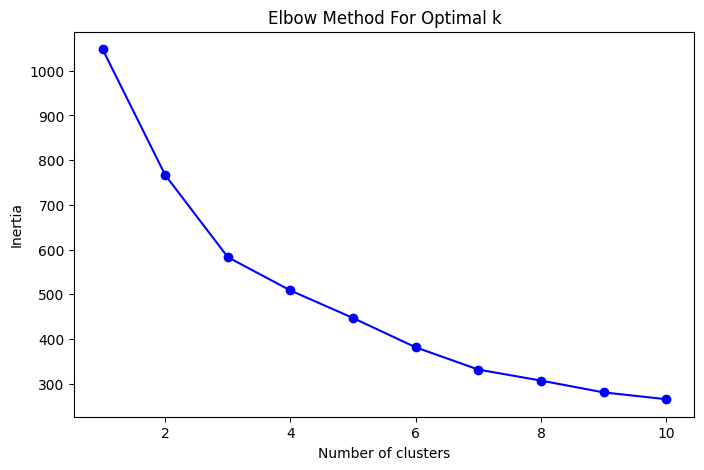

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [37]:
# Apply K-Means clustering with the chosen number of clusters
optimal_k = 3  # Example: assuming the elbow shows 3 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the original DataFrame
df_ph_filtered['Cluster'] = clusters

# Display the DataFrame with clusters
print(df_ph_filtered)


     FG_PCT  FT_PCT  AST_TOV  STL_TOV  Cluster
6     0.443   0.748     2.68     0.58        0
83    0.468   0.796     2.01     0.74        0
100   0.472   0.787     1.44     0.53        2
126   0.371   0.571     2.51     0.39        0
167   0.405   0.746     0.77     0.21        2
..      ...     ...      ...      ...      ...
191   0.000   0.000     0.00     0.00        1
193   0.583   1.000     0.00     1.00        2
196   0.000   0.000     0.00     0.00        1
206   0.600   0.000     0.00     0.00        1
211   0.000   0.000     0.00     0.00        1

[262 rows x 5 columns]


/tmp/ipykernel_4927/4176090589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph_filtered['Cluster'] = clusters


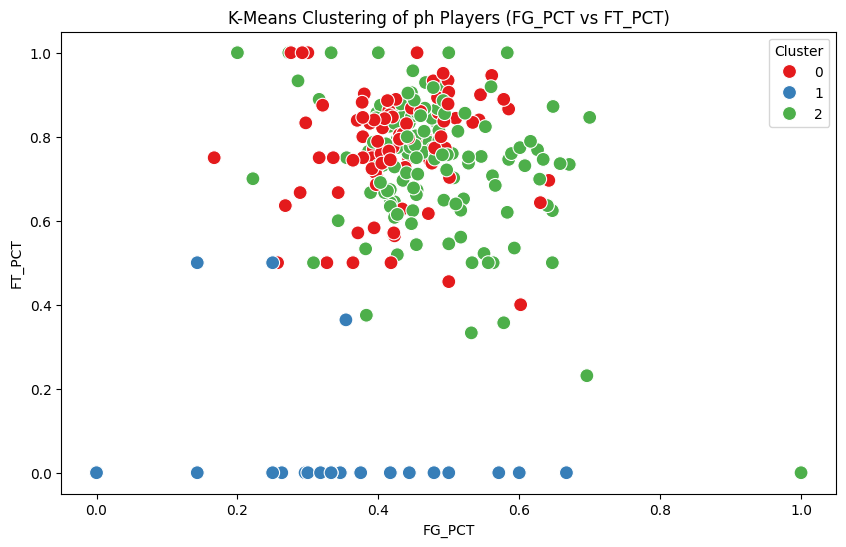

In [38]:
import seaborn as sns

# Visualize the clusters for two features (you can choose different feature pairs)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ph_filtered['FG_PCT'], 
                y=df_ph_filtered['FT_PCT'], 
                hue=df_ph_filtered['Cluster'], 
                palette='Set1', s=100)
plt.title('K-Means Clustering of ph Players (FG_PCT vs FT_PCT)')
plt.show()


In [39]:
cluster_summary = df_ph_filtered.groupby('Cluster').mean()
print(cluster_summary)


           FG_PCT    FT_PCT   AST_TOV   STL_TOV
Cluster                                        
0        0.425860  0.774043  2.477742  1.041290
1        0.273407  0.050519  0.623704  0.148148
2        0.472366  0.744810  1.113732  0.441408


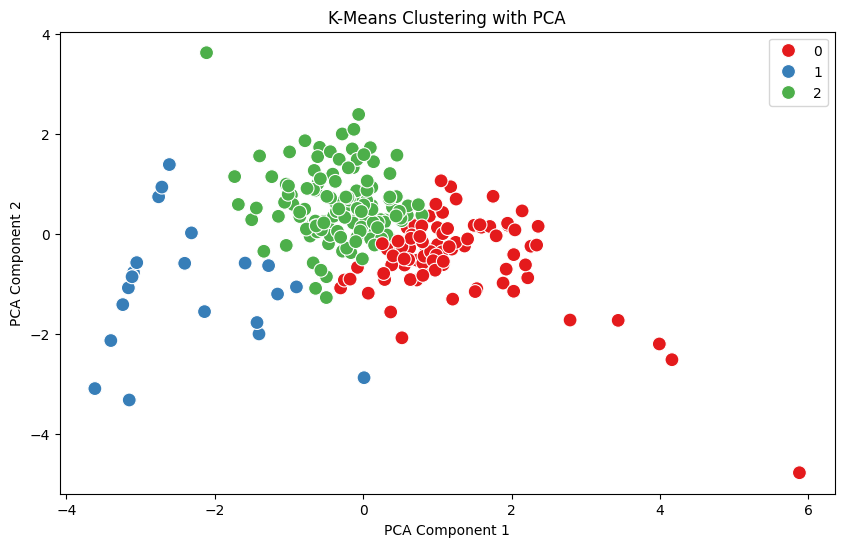

In [40]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette='Set1', s=100)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
